In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [6]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

<Axes: xlabel='cgpa', ylabel='iq'>

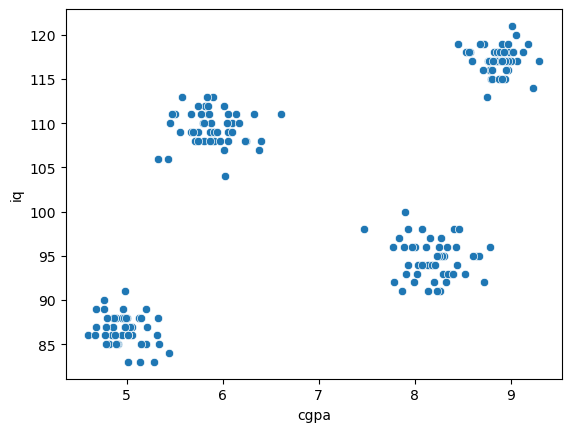

In [9]:
sns.scatterplot(x=df['cgpa'], y=df['iq'])

In [10]:
scaler = StandardScaler()

In [11]:
df_scaled = scaler.fit_transform(df)

In [12]:
df_scaled

array([[-1.14404869, -1.15364097],
       [-0.6687506 ,  0.9071682 ],
       [ 0.84973424, -0.74147914],
       [ 0.79417991, -0.41174967],
       [-0.94652221,  0.6598711 ],
       [-0.681096  ,  0.57743873],
       [ 0.88059775, -0.32931731],
       [ 1.12133315,  1.07203293],
       [-0.73665032,  0.6598711 ],
       [ 0.68307127, -0.65904677],
       [-1.47120193, -1.31850571],
       [-0.54529655,  0.6598711 ],
       [ 0.72628018, -0.41174967],
       [-1.22429383, -1.15364097],
       [-0.78603195,  0.49500636],
       [ 0.81887072, -0.57661441],
       [-0.9156587 ,  0.74230346],
       [ 0.54727181, -0.90634387],
       [-0.57616006,  0.74230346],
       [-0.70578681,  0.9071682 ],
       [ 0.30036371, -0.32931731],
       [-1.31071166, -1.31850571],
       [ 0.49171749, -0.82391151],
       [-1.36009328, -1.23607334],
       [-1.24898464, -1.15364097],
       [ 0.58430803, -0.32931731],
       [-1.31071166, -1.23607334],
       [ 1.35589585,  1.4017624 ],
       [ 0.65220775,

In [14]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', n_init=10)
    km.fit_predict(df_scaled)
    wcss.append(km.inertia_)

D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [15]:
wcss

[400.0,
 190.80730946983087,
 96.9025901050082,
 8.477237626556294,
 7.318389571309994,
 6.508184953449993,
 5.797936281416637,
 5.191345939759792,
 4.700827746543471,
 4.143624139507649]

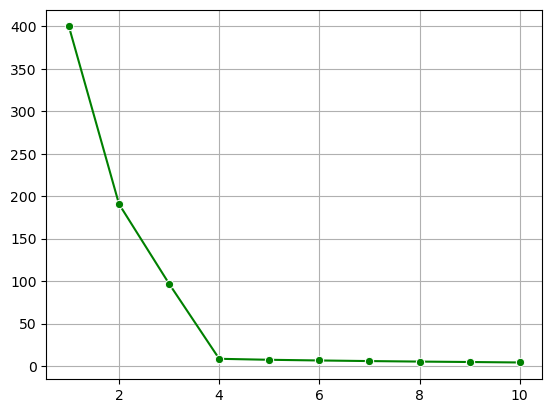

In [24]:
sns.lineplot(x=range(1,11), y=wcss, marker='o', color='green')
plt.grid(True)

In [25]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10)

In [26]:
clusters = km.fit_predict(df_scaled)

D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
df['cluster']= clusters

In [28]:
km.labels_

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

In [29]:
km.inertia_

8.477237626556294

In [30]:
km.cluster_centers_

array([[ 1.16540625,  1.25008684],
       [-1.24429338, -1.26080305],
       [-0.6719604 ,  0.62030356],
       [ 0.75084754, -0.60958735]])

In [31]:
df.head()

,cgpa,iq,cluster
0,5.13,88,1
1,5.90,113,2
2,8.36,93,3
3,8.27,97,3
4,5.45,110,2


<Axes: xlabel='cgpa', ylabel='iq'>

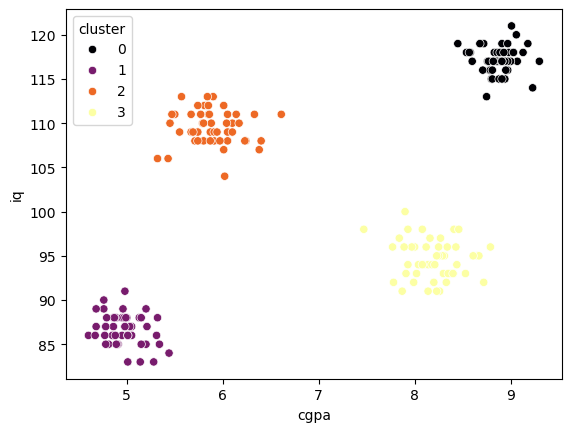

In [35]:
sns.scatterplot(x=df['cgpa'], y=df['iq'], hue=df['cluster'], palette='inferno')